# Experiment 1

This is an alternative to the first experiment of the article (Figure 3a).
The difference is that I compute and report the $-\log(p)$ instead of the
detection rate. I run the algorithm $20$ times and report the average $-\log(p)$.

In [1]:
import numpy as np
from pathlib import Path
from ipywidgets import IntProgress, Label
from IPython.display import display
from core.data import generate_data
from core.algorithm import test_confounder
from core.utils import draw_contourf, save_fig
%matplotlib inline

We set the initial parameters.

In [2]:
num_experiments = 20  # Number of repetitions
num_observations = 2  # Number of observations per environment

num_envs_range = (50, 2000)
num_envs_divs = 30
num_coefs_range = (0.0, 10.0)
num_coefs_divs = 30

We perform the experiment.

In [3]:
num_envs = np.round(np.linspace(num_envs_range[0], num_envs_range[1], num_envs_divs, endpoint=True)).astype(int)
coefs = np.linspace(num_coefs_range[0], num_coefs_range[1], num_coefs_divs, endpoint=True)
results = np.empty((num_experiments, num_coefs_divs, num_envs_divs))
label, progress = Label(), IntProgress(min=0, max=num_experiments)
display(label, progress)

for expr_idx in np.arange(num_experiments):
    label.value = f"Doing experiment {expr_idx + 1} out of {num_experiments}."
    progress.value = expr_idx + 1

    for coef_idx, coef in enumerate(coefs):
        data = generate_data(num_envs_range[1], num_observations, coef)

        for num_env_idx, num_env in enumerate(num_envs):
            results[expr_idx, coef_idx, num_env_idx] = test_confounder(data, num_env=num_env)

results = np.mean(results, axis=0, keepdims=False)

Label(value='')

IntProgress(value=0, max=20)

Display the contour plot.

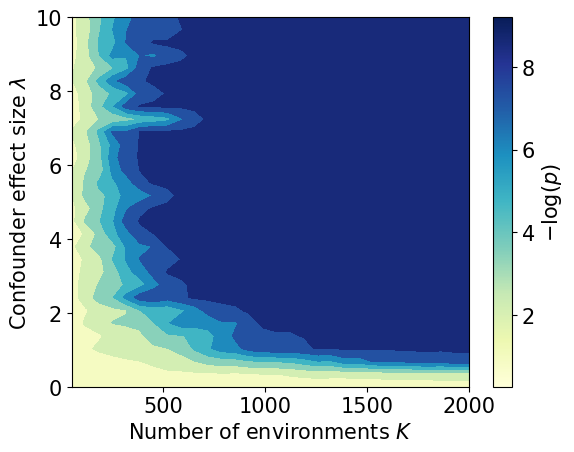

In [4]:
Z = -np.log(results)
X, Y = np.meshgrid(num_envs, coefs)
fig = draw_contourf(X, Y, Z,
                    xlabel=r'Number of environments $K$',
                    ylabel=r'Confounder effect size $\lambda$',
                    cbar_label=r'$-\log(p)$')

save_fig(Path('results', 'expr1.pdf'), fig)
fig